In [1]:
%matplotlib notebook
import matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from fridge import Fridge
from tes import TES
from QET import QET
from detector import Detector
from PD4 import PD4
from electronics import Electronics
from absorber import Absorber
from simulated_noise import simulate_noise
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from MaterialProperties import TESMaterial

In [2]:
printing = False 
fSnolab = Fridge("SNOLAB", 20e-3, 145e-3, 900e-3, 4.8, 0)
# Absorber: Silicon. Height 1mm. Radius 38.1mm. W safety 3mm. 
absorber = Absorber("Si", "cylinder", 1e-3, 38.1e-3, 3e-3, printing) # same as matlab
eSnolab = Electronics(fSnolab, fSnolab.get_TCP(), fSnolab.get_TMC())
eSLAC = Electronics(fSnolab, fSnolab.get_TMC(), fSnolab.get_TMC(), 5e-3, 6e-3, 25e-9, 25e-9, 4e-12)

tungsten = TESMaterial()

In [3]:
#PD2 ~Upgrade~ input values 
tes_l = 140e-6 # same as matlab
tes_w = 2.5e-6 # this is what we want, Fabrication is questionable (PD2 turned out to be 3.5)
# standard tes width we can do at Stanford: 2.5um (Matt will check)
# at TAMU tes width can do 3 um 
#foverlap = 1.2 # same as matlab (why greater than 1??)
#foverlap = 0.8 # same as matlab (why greater than 1??)
n_fin = 6
#l_fin = 200e-6 # same as matlab
h_fin = 600e-9 # same as matlab
sigma = tungsten._gPep_v
T_eq = -100
res_n = 200e-3 # want 100 mOhm 
l_overlaps = [4e-6, 6e-6, 8e-6, 10e-6, 12e-6, 14e-6, 16e-6, 18e-6, 20e-6, 22e-6,24e-6, 30e-6] # radius of fin connector
l_fins = [ 100e-6,  125e-6, 150e-6,175e-6, 200e-6, 225e-6]
l_fins_mu = []
l_overlaps_mu = []
for l_o in l_overlaps:
    l_overlaps_mu.append(l_o*(10**6))
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))

## Initial Specs
* $n_{fin} = 6$
* $l_{tes} = 140 \mu m$
* $w_{tes} = 2.5 \mu m$
* $h_{fin} = 600 nm$
* $R_{n} = 200 m\Omega$

<IPython.core.display.Javascript object>


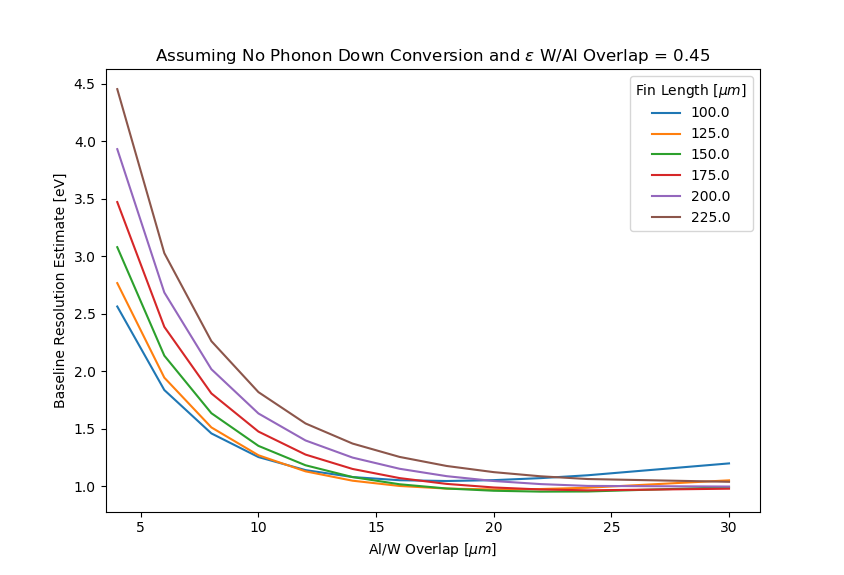

Fin Length              0.00015
Overlap                 1e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.0018961547104010994
Percent QP Absorb SA    0.008671530634341255
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.24306248126679825
Phonon Absorption Time  4.9358158619504085e-05
Time ETF                6.666815483629353e-05
BASE RESOLUTION         1.352805516205702
Fin Length              0.00015
Overlap                 2e-05
Percent Active SA       0.0067753759239401554
Percent Passive SA      0.0018961547104010994
Percent QP Absorb SA    0.008671530634341255
N tes                   672
Rn                      0.19999999999999993
fQP Absorb              0.5179517507078939
Phonon Absorption Time  4.9358158619504085e-05
Time ETF                6.666815483629355e-05
BASE RESOLUTION         0.9629141451985289
INVALID DESIGN!!!
Fin Length              0.00015
Overlap                 2.4e-05
Percent Active SA 

In [4]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6 or l_over == 24e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pActiveArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pActiveArea)
            pPassiveArea = det._SA_passive/det._absorber.get_SA()
            print("Percent Passive SA     ", pPassiveArea)
            print("Percent QP Absorb SA   ", det._fSA_qpabsorb)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.15, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.15")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.8, tungsten, printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if ( l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p >perim: print("INVALID DESIGN!!!")
            print("Fin Length             ", l_f)
            print("Overlap                ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n )
            print("fQP Absorb             ", det._qet._eQPabsb)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.8")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
l_f = 150e-6 
l_over = 20e-6

# Check Robustness of Design
effic = [0, .1, .15, .3, .45, .6]
sig = []
f, ax = plt.subplots(1)
for ef in effic:
    tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, ef, tungsten , printing)
    qet = QET( l_f, h_fin, tes)
    det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
    e_res = simulate_noise(det)
    sig.append(e_res)
    fin_string = "{}"
ax.plot(effic, sig )
ax.set_title("Assuming No Phonon Down Conversion")
ax.set_xlim(xmin =0)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Estimated Collection Efficiency")
plt.show()

In [ ]:
n_fin = 8
res_n = 200e-3 # want 100 mOhm 

Increase $n_{fin}$ from 6 to 8. But can't have both 8 $20\mu m$ overlap fin connectors *and* $140 \mu m$ long TES.  

In [ ]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 150e-6 or l_f == 175e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6):
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print(n_fin, " Fins")
            print("Fin Length             ", l_f)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("TES l                  ", det._tes._l)
            print("overlap                ", l_over)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "Fin Length {}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [ ]:
n_fin =4
tes_l = 100e-6 

In [ ]:
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 100e-6 or l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6 or l_over == 20e-6) :
            perim = tes_l*2 + 14e-6*2 - 6e-6*n_fin
            overlap_p = n_fin*l_over*2
            if overlap_p > perim: print("INVALID DESIGN!!!")
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [ ]:
res_n = 150e-3 
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps:
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if (l_f == 125e-6 or l_f == 150e-6) and (l_over == 10e-6 or l_over == 12e-6) :
            print("Fin Length                ", l_f)
            print("Overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- tes length             ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
l_f = 150e-6 
res_n = 200e-3

n_fins = [2,4,6,8]
f, ax = plt.subplots(1)
for n in n_fins:
    print(n, " FINS")
    print("------------------------------------------------")
    sigma_e = []
    n_f = [n]*len(l_overlaps_mu)
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1,0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_over == 20e-6:
            print("overlap                   ", l_over)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Active Surface Area    ", det._SA_active)
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- TES l                  ", det._tes._l)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    plt.scatter(l_overlaps_mu, n_f,  s=200, c=sigma_e, cmap = 'RdPu')
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Number of Fins")
plt.colorbar()
plt.show()

In [ ]:
l_over = 20e-6 

n_fins = [2,4,6,8]
f, ax = plt.subplots(1)
for n in n_fins:
    sigma_e = []
    n_f = [n]*len(l_fins_mu)
    for l_f in l_fins: 
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten , printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if n == 6 and l_f == 150e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
        if n == 4 and l_f == 125e-6:
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    plt.scatter(l_fins_mu, n_f,  s=200, c=sigma_e, cmap = 'RdPu')
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlabel("Fin Length")
ax.set_ylabel("Number of Fins")
plt.colorbar()
plt.show()

In [ ]:
l_f = 150e-6
res_n = 150e-3
tes_l = 100e-6

f, ax = plt.subplots(1)
for n in n_fins:
    print(n, " FINS")
    print("---------------------------------------------")
    sigma_e = []
    for l_over in l_overlaps: 
        perim = tes_l*2 + 14e-6*2 - 6e-6*n
        overlap_p = n*l_over*2
        tes = TES(tes_l, tes_w, l_over, n, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_over == 20e-6:
            if overlap_p > perim:
                print("INVALID DESIGN!!!")
            print("-- overlap                ", l_over)
            print("-- TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("-- Percent Active SA      ", pArea)
            print("-- N tes                  ", det._tes._nTES)
            print("-- Fin Length             ", l_f)
            print("-- Rn                     ", det._tes._total_res_n)
            print("-- QP Eff                 ", det._qet._eQPabsb)
            print("-- Phonon Absorption Time ", det._t_pabsb)
            print("-- Time ETF               ", det._tes._tau_etf)
            print("-- BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(n) )
plt.legend(title = "Number of Fins")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate [eV]")
plt.show()

In [ ]:
n_fin = 8
tes_l = 140e-6
print(n_fin, " FINS")
print("--------------------------------------------------------------------")
f, ax = plt.subplots(1)
for l_f in l_fins:
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.45, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 150e-6 and (l_over == 14e-6 or l_over == 20e-6):
            print("Ovelap                 ", l_over)
            print("TES length             ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Percent Active SA      ", pArea)
            print("N tes                  ", det._tes._nTES)
            print("Rn                     ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF               ", det._tes._tau_etf)
            print("BASE RESOLUTION        ", e_res)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()

In [ ]:
# Decrease Rn requirement to 100 mOhms? 
res_n = 100e-3 # want 100 mOhm 
f, ax = plt.subplots(1)
for l_f in l_fins:
    l_fins_mu.append(l_f*(10**6))
    sigma_e = []
    for l_over in l_overlaps: 
        tes = TES(tes_l, tes_w, l_over, n_fin, sigma, T_eq, res_n, 0.5, tungsten ,  printing)
        qet = QET( l_f, h_fin, tes)
        det = Detector("det name", fSnolab, eSLAC, absorber, qet, tes, 1, 0)
        e_res = simulate_noise(det)
        sigma_e.append(e_res)
        if l_f == 125e-6 and l_over == 10e-6:
            print("TES length ", det._tes._l)
            pArea = det._SA_active/det._absorber.get_SA()
            print("Active Surface Area ", det._SA_active)
            print("Percent Active SA ", pArea)
            print("N tes ", det._tes._nTES)
            print("Base Resolution ", e_res)
            print("Rn ", det._tes._total_res_n)
            print("Phonon Absorption Time ", det._t_pabsb)
            print("Time ETF ", det._tes._tau_etf)
    fin_string = "{}"
    ax.plot(l_overlaps_mu, sigma_e, label = fin_string.format(l_f*(10**6)) )
plt.legend(title = "Fin Length [$\mu m$]")
ax.set_title("Assuming No Phonon Down Conversion and $\epsilon$ W/Al Overlap = 0.45")
ax.set_xlim(xmin =3.5)
ax.set_xlabel("Al/W Overlap [$\mu m$]")
ax.set_ylabel("Baseline Resolution Estimate")
plt.show()